In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets.samples_generator import make_blobs

from sklearn.model_selection import GridSearchCV

%precision %.7g
%matplotlib inline

# 0. Together

K-Nearest Neighbors is a straightforward algorithm: given a training set, classify a new (unknown) data point by counting the K nearest known points, and choosing the most common classification.

In this classwork we'll use ggplot to plot the boundaries of knn, and see how the size, shape, and overlap of clusters affect these boundries.

In [2]:
def plotKNN2D(Xdf,y,k):
    # X can only have 2 dimensions becuase of plotting
    Xdf.columns = ["x0", "x1"]

    #grab the range of features for each feature
    x0_range = np.linspace(min(Xdf["x0"]) - np.std(Xdf["x0"]),
                           max(Xdf["x0"]) + np.std(Xdf["x0"]), num = 100)
    x1_range = np.linspace(min(Xdf["x1"]) - np.std(Xdf["x1"]),
                           max(Xdf["x1"]) + np.std(Xdf["x1"]), num = 100)

    #get all possible points on graph
    x0 = np.repeat(x0_range,100)
    x1 = np.tile(x1_range,100)
    x_grid = pd.DataFrame({"x0": x0, "x1": x1})

    #build model
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xdf,y)

    # bredict all background points
    p = knn.predict(x_grid)
    x_grid["p"] = p #add to dataframe
    
    #build the plot
    bound = (ggplot(x_grid, aes(x = "x0", y = "x1", color = "factor(p)")) +
                 geom_point(alpha = 0.2, size = 0.2) + theme_minimal() +
                 scale_color_discrete(name = "Class") +
                 geom_point(data = Xdf, mapping = aes(x = "x0", y = "x1", color = "factor(y)"), size = 2))
    print(bound)

# 1. Generating Fake Clusters

## 1.1 Explore

We can use the sklearn function `make_blobs()` in order to generate fake groups of data. The `centers` variable stores the xy coordinates of the centers of each of our groups as tuples. The `cluster_std` variables stores the standard deviation for each cluster. `n` is the number of data points to be generated from the clusters.

Changing `centers` changes how far apart the centers of the clusters are, whereas changing `cluster_std` changes how diffuse/spread out the clusters are. Try playing around with these numbers and using ggplot to plot the data (color by `factor(y)`). Notice how changing the numbers changes the layout of the data.

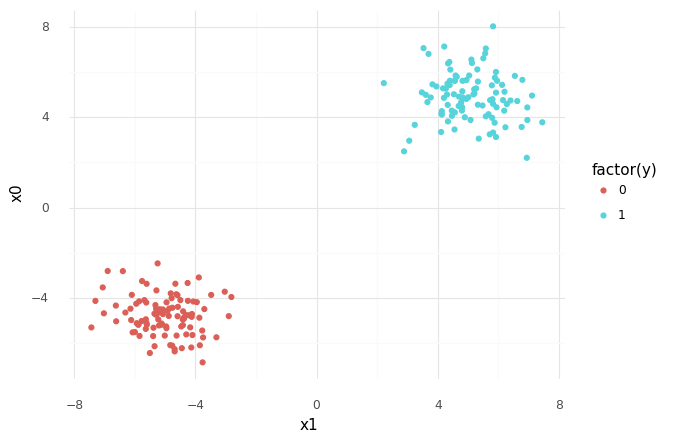

<ggplot: (8795466274127)>

In [3]:
### variables #################################################
centers = [(-5, -5),
           (5, 5)]
cluster_std = [1, 1]
n = 200
### /variables #################################################

X, y = make_blobs(n_samples=n, cluster_std=cluster_std,
                  centers=centers, n_features=2, random_state=1)

# make it into a dataframe for ggplot
train = pd.DataFrame(X)
train.columns = ["x0", "x1"]
train["y"] = y

### YOUR CODE HERE ###
# make a scatterplot of the data we just created
(ggplot(train, aes(x = "x1", y = "x0", color = "factor(y)")) + geom_point() +
theme_minimal())

## 1.2 How does changing k affect the decision boundary?

Using the `plotKNN2d()` function, and the `X` and `y` data generated below, examine what happens to the decision boundaries as you try different k's (try 1,3,5,10, 25, and 50).

How does changing k affect the decision boundary?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

### Answer
as k increases, the boundary gets smoother and has fewer odd...pockets...in the classification boundary.

In [4]:
centers = [(-2, -2),
           (5, 5)]
cluster_std = [7, 7]
n = 200

X, y = make_blobs(n_samples=n, cluster_std=cluster_std,
                  centers=centers, n_features=2, random_state=1)

Xdf = pd.DataFrame(X)

### MAKE A SCATTER PLOT OF THE DATA ### 


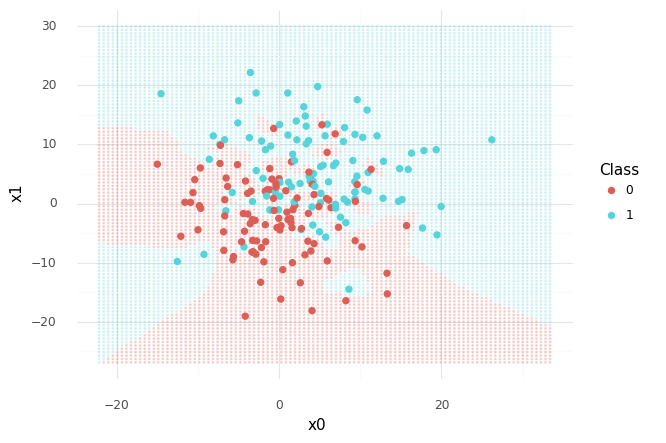

<ggplot: (8795462156060)>


In [5]:
# k = 1

plotKNN2D(Xdf,y,k = 1)

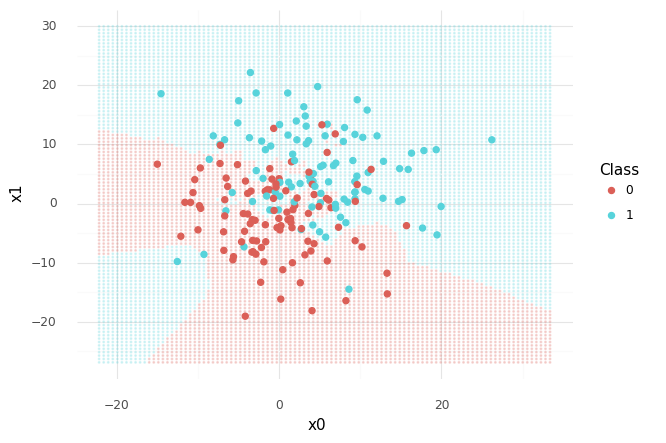

<ggplot: (8795466259944)>


In [6]:
# k = 3
plotKNN2D(Xdf,y,k = 3)

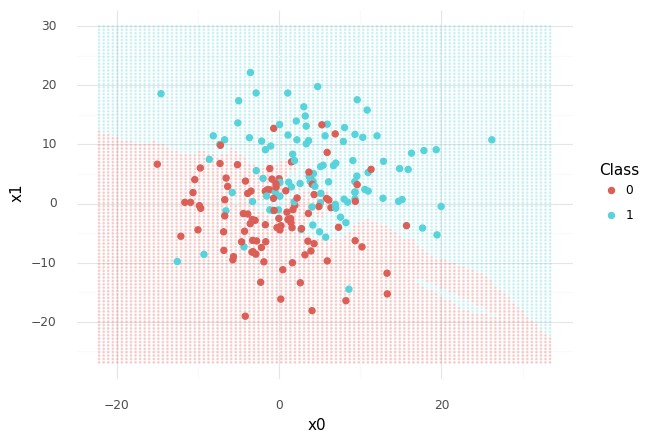

<ggplot: (8795467447025)>


In [7]:
# k = 5
plotKNN2D(Xdf,y,k = 5)

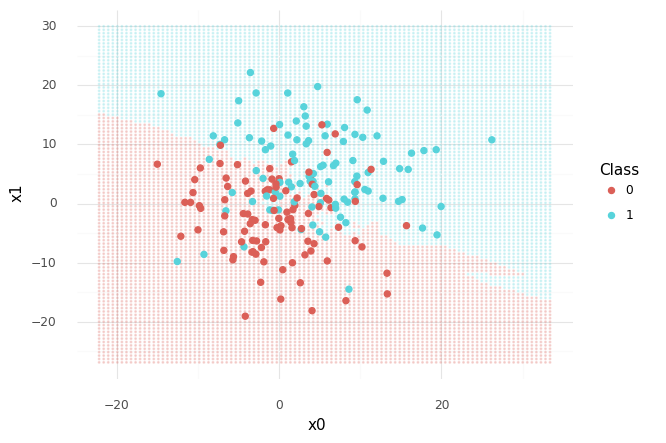

<ggplot: (8795467038443)>


In [8]:
# k = 10
plotKNN2D(Xdf,y,k = 10)

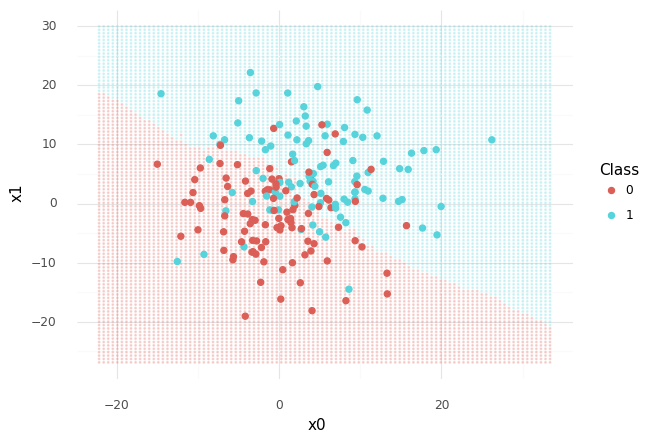

<ggplot: (8795467100916)>


In [9]:
# k = 25
plotKNN2D(Xdf,y,k = 25)

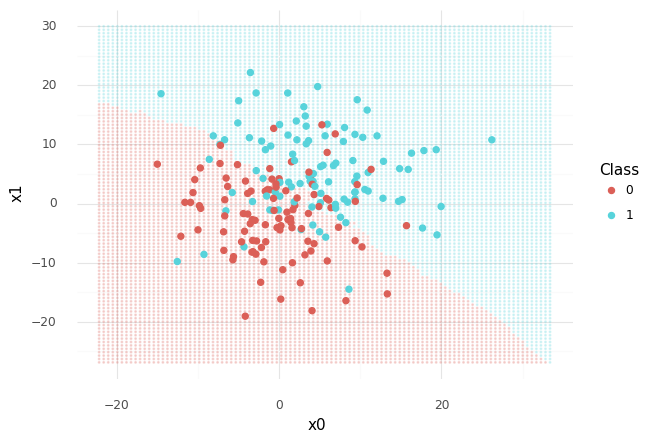

<ggplot: (8795467105732)>


In [10]:
# k = 50
plotKNN2D(Xdf,y,k = 50)

## 1.3 How does changing k affect the decision boundary (highly separable groups)?

Now let's see how changing k affects the boundary when the groups are not overlapping much. Using the `plotKNN2d()` function, and the `X` and `y` data generated below, examine what happens to the decision boundaries as you try different k's (try 1,3,5,10, 25, and 50).

How does changing k affect the decision boundary when the groups are FAR apart to begin with?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

### Answer
Because the clusters are so separate already, changing k doesn't really make THAT much of a difference.

In [11]:
centers = [(-5, -5),
           (5, 5)]
cluster_std = [2, 2]
n = 200

X, y = make_blobs(n_samples=n, cluster_std=cluster_std,
                  centers=centers, n_features=2, random_state=1)

Xdf = pd.DataFrame(X)

### MAKE A SCATTER PLOT OF THE DATA ### 


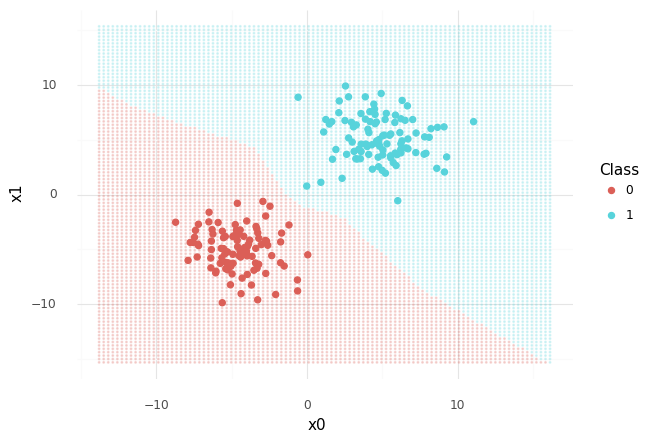

<ggplot: (8795467109419)>


In [12]:
# k = 1
plotKNN2D(Xdf,y,k = 1)

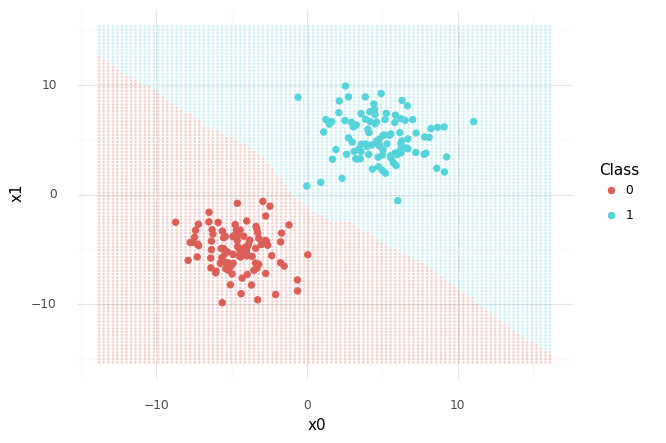

<ggplot: (8795467042289)>


In [14]:
# k = 3
plotKNN2D(Xdf,y,k = 3)

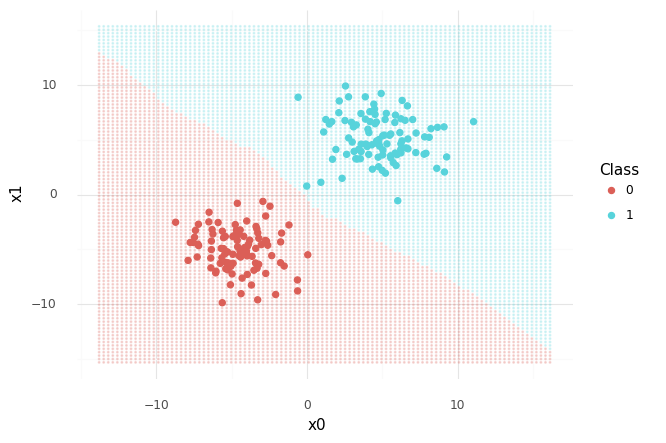

<ggplot: (8795467453784)>


In [15]:
# k = 5
plotKNN2D(Xdf,y,k = 5)

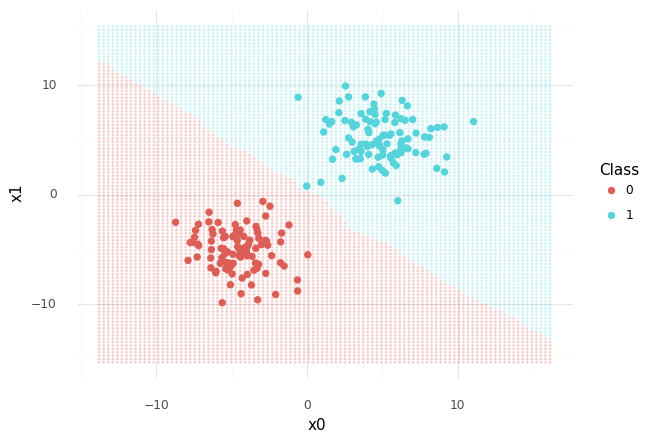

<ggplot: (8795468414025)>


In [16]:
# k = 10
plotKNN2D(Xdf,y,k = 10)

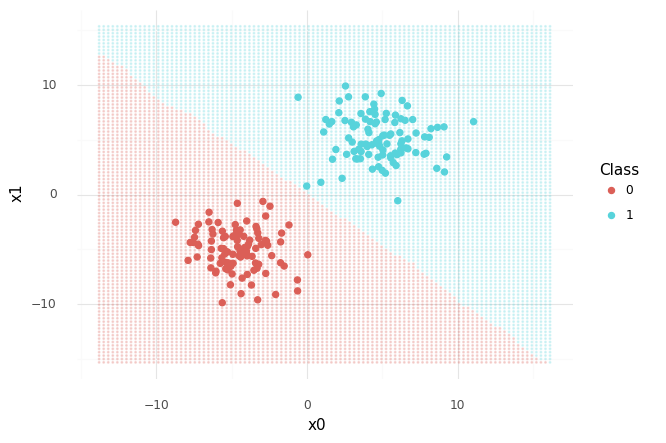

<ggplot: (8795467887827)>


In [17]:
# k = 25
plotKNN2D(Xdf,y,k = 25)

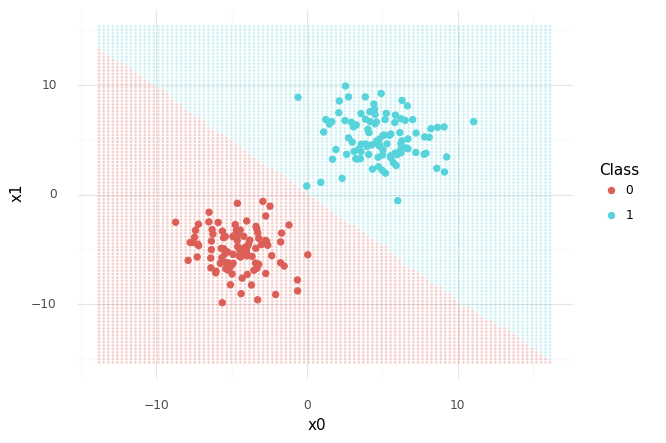

<ggplot: (8795466491447)>


In [18]:
# k = 50
plotKNN2D(Xdf,y,k = 50)

## 1.3 How does changing k affect the decision boundary (imbalanced classes)?

Now let's see how changing k affects the boundary when the groups have different numbers of samples. Using the `plotKNN2d()` function, and the `X` and `y` data generated below, examine what happens to the decision boundaries as you try different k's (try 1,3,5,10, 25, 50, and **100**).

How does changing k affect the decision boundary when the groups are imbalanced?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

### Answer
 
Because of the imbalanced classes, when you set k to be really close to the number of data points in the smaller class, you basically classify EVERY single data point as the larger class (just becuase there are more of those points, so they get more votes)

In [19]:
centers = [(-2, -2),
           (5, 5)]
cluster_std = [6, 6]

n1 = 50
n2 = 150

X, y = make_blobs(n_samples=[n1,n2], cluster_std=cluster_std,
                  centers=centers, n_features=2, random_state=1)

Xdf = pd.DataFrame(X)

### MAKE A SCATTER PLOT OF THE DATA ### 


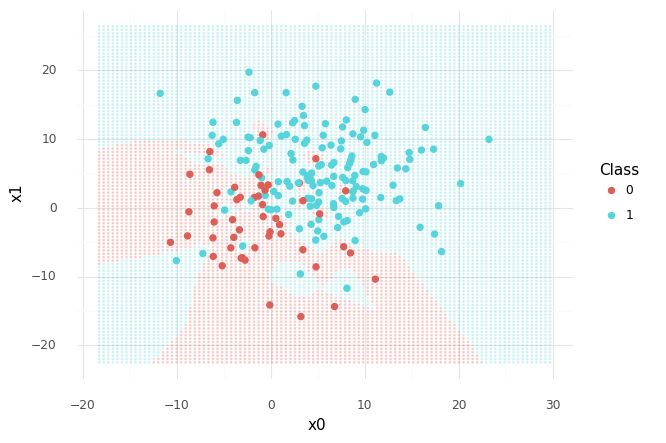

<ggplot: (8795467044166)>


In [20]:
# k = 1

plotKNN2D(Xdf,y,k = 1)

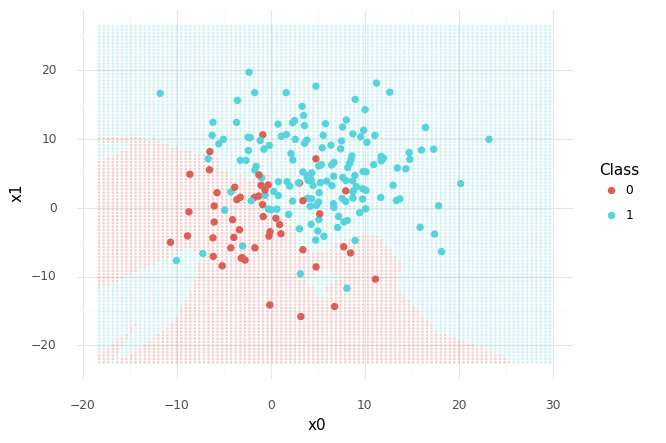

<ggplot: (8795468337740)>


In [21]:
# k = 3
plotKNN2D(Xdf,y,k = 3)

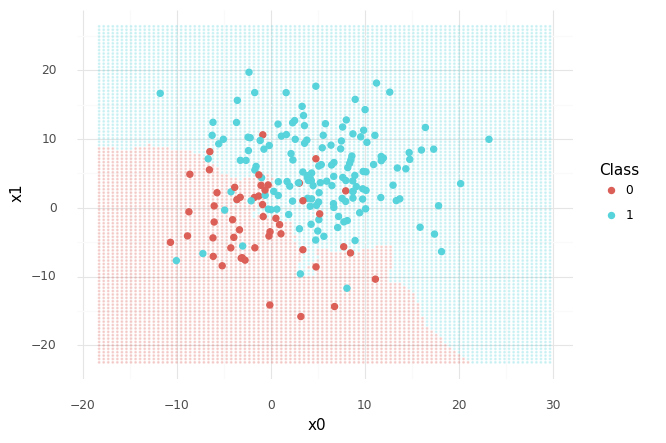

<ggplot: (8795439177298)>


In [22]:
# k = 5
plotKNN2D(Xdf,y,k = 5)

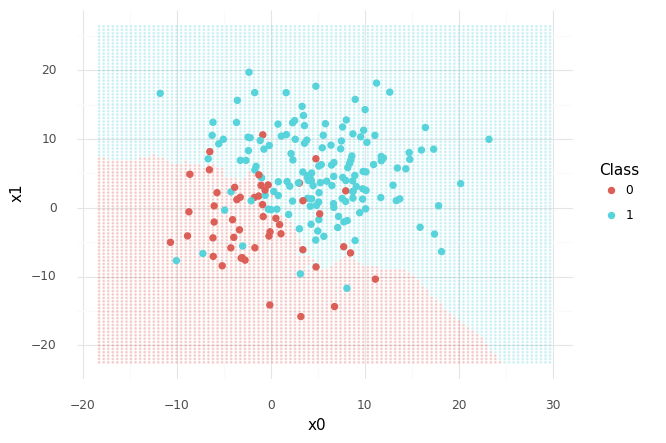

<ggplot: (8795439911903)>


In [23]:
# k = 10
plotKNN2D(Xdf,y,k = 10)

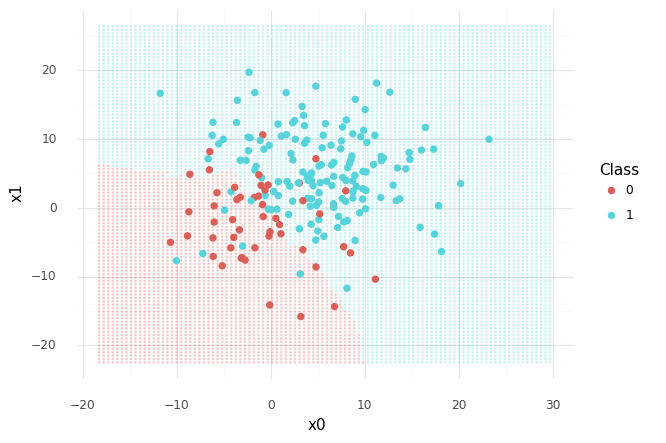

<ggplot: (8795466719757)>


In [24]:
# k = 25
plotKNN2D(Xdf,y,k = 25)

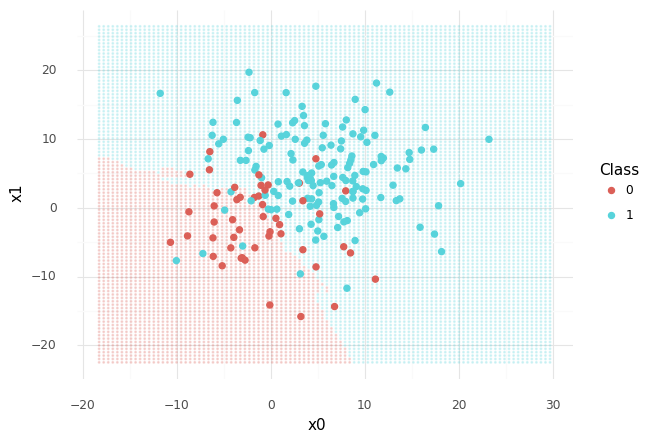

<ggplot: (8778346499178)>


In [125]:
# k = 50
plotKNN2D(Xdf,y,k = 50)

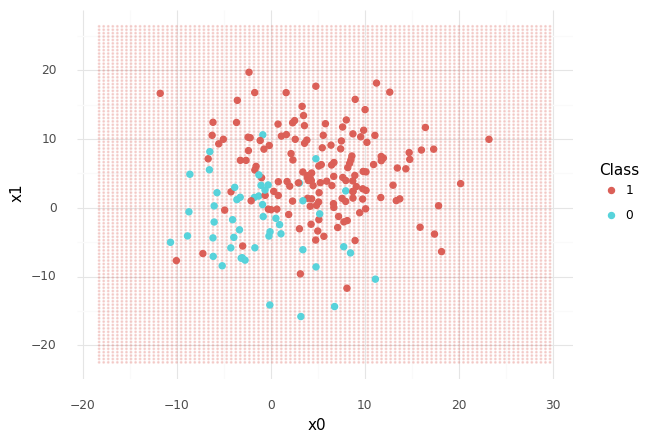

<ggplot: (8795469895193)>


In [25]:
# k = 100
plotKNN2D(Xdf,y,k = 100)

# 2. The KNN Algorithm

Now that you've explored the impact of k in different situations, let's build our own function, `myKNN()` that will calculate the predicted class of a datapoint `d` using the "training data" `X` and true classifications `y`. Your function should take in four arguments: an array for the data point we want to predict (`d`), a data frame with the training data (`X`), an array/series with the true classes for `X` (`y`), and `k` an integer for KNN.

It should return the predicted class for `d`. Your function should be able to handle any number of predictors, and any number of rows in the training data. But you can assume that there are only TWO classes: `0` and `1`. Feel free to write helper functions if needed, but do not use pre-built sklearn functions to do this.

(Note: notice that you don't really need to *train* this algorithm, most of the computation has to do with prediction rather than training).

HINTS: [distances](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html), [k-nearest](https://numpy.org/doc/stable/reference/generated/numpy.argpartition.html)

In [27]:
def myKNN(d, X, y, k):
    # d is an ARRAY with that data points predictor values like: np.array([0, 0.273, 0.23, 1])
    # d and X can have ANY number of predictors.
    # X is a dataframe with the "training" data
    # y is an array/series with the true classes for the training set
    ### YOUR CODE HERE ###

    # calculate distances---
    dists = [np.linalg.norm(d-Xdf.iloc[i]) for i in range(0,X.shape[0])]

    # find k smallest distances---
    k_index = np.argpartition(dists,k)[:k]

    # get votes from k neighbors---
    votes = [y[i] for i in k_index]

    # find most common class---
    predictedClass = int(round(np.mean(votes)))
    # (because there is only 2 classes, if np.mean > 0.5,
    # then 1 is the class, if np.mean < 0.5 then 0 is the class)

    return(predictedClass)


<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />